### BUSA3020: Advanced Analytics Techniques
### Assignment 2: Predictive Analytics 
### Student Number: 45197083

Import relevant Python packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Read the data and show the first 5 columns of the data 


In [2]:
df = pd.read_csv("TitanicData_AllPassengers.csv")
df.index = np.arange(1,len(df)+1) #Remove 0 (default) indexing on Python
df.head(5)

,Survived,Passenger Class,Name,Gender,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,LifeBoat
1,Yes,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2
2,Yes,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11
3,No,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN
4,No,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN
5,No,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN


#### Exploratary Data Analysis (EDA)

In [3]:
#Show the list of columns within the data set. 
df.columns

Index(['Survived', 'Passenger Class', 'Name', 'Gender', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number', 'Passenger Fare',
       'Cabin', 'Port of Embarkation', 'LifeBoat'],
      dtype='object')

#### Data Dictionary: 
- Survived: It shows whether the passengers have survived in the incident. 
- Passenger Class: It shows the ticket class of the passengers. 
- Name: The name of the passenger. 
- Sex: The gender of the passenger.
- Age: The age of the passenger. 
- No of Sibings or Spouses on board: Did the passenger has any sibings/spouses on board in the RMS Titantic. 
- No of Parents or Children on board: Did the passenger has any parents/children on board in the RMS Titantic. 
- Ticket Number: The ticket number of the passenger.
- Passenger Fare: The price of the passenger fare.
- Cabin: The cabin location of the passneger.
- Port of Embarkatation: The geographic location in a routing scheme from which the passenger depart.
- Lifeboat: Is the passenger in one of the lifeboats available in the RMS Titantic? If so, which one? 

It shows that are there are some missing values within both variables 'Cabin' and 'Life Boat'. Further action is needed to resolve such issue. 

In [4]:
#Generate some descriptive statistics of the numerical features.
df.describe()

,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881135,0.498854,0.385027,33.295479
std,14.413500,1.041658,0.865560,51.758668
min,0.166700,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


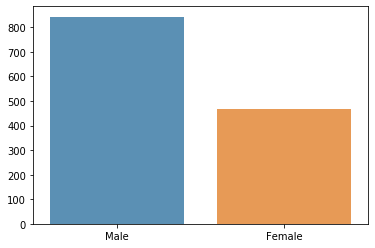

In [5]:
gender_count = df['Gender'].value_counts()
gender_count = gender_count[:10,]
sns.barplot(gender_count.index, gender_count.values, alpha=0.8, order=["Male", "Female"])

Text(0.5, 0, 'Survived?')

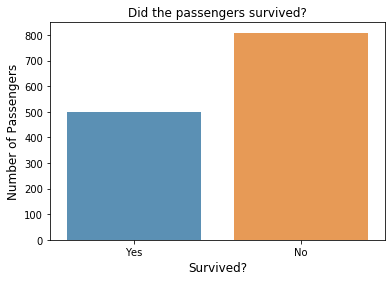

In [6]:
survived_count = df['Survived'].value_counts()
survived_count = survived_count[:10,]
sns.barplot(survived_count.index, survived_count.values, alpha=0.8,order=["Yes", "No"])
plt.title('Did the passengers survived?')
plt.ylabel('Number of Passengers', fontsize=12)
plt.xlabel('Survived?', fontsize=12)

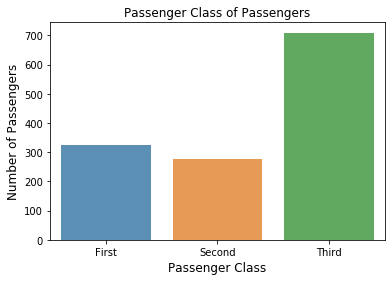

In [7]:
class_count = df['Passenger Class'].value_counts()
class_count = class_count[:10,]
sns.barplot(class_count.index, class_count.values, alpha=0.8, order=["First", "Second","Third"])
plt.title('Passenger Class of Passengers')
plt.ylabel('Number of Passengers', fontsize=12)
plt.xlabel('Passenger Class', fontsize=12)

plt.show()

#### Data Cleansing 

Check missing data within the dataset

In [8]:
df.isnull().sum()

Survived                                 0
Passenger Class                          0
Name                                     0
Gender                                   0
Age                                    263
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           1
Cabin                                 1014
Port of Embarkation                      2
LifeBoat                               823
dtype: int64

Find out the dimensions of the data (**Before dropping the values**). 

In [9]:
df.shape

(1309, 12)

Dealing with Missing Values. 

- Drop the missing values of Age column. 


In [10]:
df = df.dropna(axis=0, subset=['Age'])

- The column **Life Boat** is dropped as if the passenger got on a life boat, he/she would likely to survive. 
- The column **Cabin** is dropped as it contains many missing values - Hard to deal with. 

In [11]:
df.drop(['Cabin'], axis = 1, inplace = True) 
df.drop(['LifeBoat'], axis = 1, inplace = True) 

- Drop the missing values of Port of Embrakation and Passenger Fare column. 

In [12]:
df = df.dropna(axis=0, subset=['Port of Embarkation'])
df = df.dropna(axis=0, subset=['Passenger Fare'])

Find out the dimensions of the data (**After dropping the values**). 

In [13]:
df.shape

(1043, 10)

#### Changing the values of different variables. 

- Convert the target variable - 'Survived' into a dummy variable. 

In [14]:
df.replace(to_replace ="Yes", value ="1", inplace = True) 
df.replace(to_replace ="No", value ="0", inplace = True) 
df["Survived"] = pd.to_numeric(df["Survived"])
df.head()

,Survived,Passenger Class,Name,Gender,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Port of Embarkation
1,1,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,Southampton
2,1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,Southampton
3,0,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,Southampton
4,0,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,Southampton
5,0,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,Southampton


- Convert the variable - 'Gender' into a dummy variable. 

In [15]:
df.replace(to_replace ="Male", value ="0", inplace = True) 
df.replace(to_replace ="Female", value ="1", inplace = True) 
df["Gender"] = pd.to_numeric(df["Gender"])
df.head()

,Survived,Passenger Class,Name,Gender,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Port of Embarkation
1,1,First,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,Southampton
2,1,First,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,Southampton
3,0,First,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,Southampton
4,0,First,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,Southampton
5,0,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,Southampton


- Replace the values of "First Class", "Second Class" and "Third" into '1', '2' and '3' - for our ease of analysis. 

In [16]:
df.replace(to_replace ="First", value ="1", inplace = True) 
df.replace(to_replace ="Second", value ="2", inplace = True) 
df.replace(to_replace ="Third", value ="3", inplace = True) 
df["Passenger Class"] = pd.to_numeric(df["Passenger Class"])
df.head()

,Survived,Passenger Class,Name,Gender,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Port of Embarkation
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,Southampton
2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,Southampton
3,0,1,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,Southampton
4,0,1,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,Southampton
5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,Southampton


- Creation of age category and replace the values. 


In [17]:
age_category = pd.cut(df.Age,bins=[0,2,17,65,99],labels=['Toddler/Baby','Child','Adult','Elderly'])
df.insert(5,'Age Group',age_category)
df.replace(to_replace ="Toddler/Baby", value ="1", inplace = True) 
df.replace(to_replace ="Child", value ="2", inplace = True) 
df.replace(to_replace ="Adult", value ="3", inplace = True) 
df.replace(to_replace ="Elderly", value ="4", inplace = True) 
df['Age Group'] = pd.to_numeric(df['Age Group'])

- Creation of a column called 'Title' with all the titles from the names

In [18]:
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
display(df.Title.head())

1      Miss
2    Master
3      Miss
4        Mr
5       Mrs
Name: Title, dtype: object

In [19]:
display(df.Title.value_counts())

Mr          580
Miss        209
Mrs         169
Master       53
Rev           8
Dr            7
Col           4
Mlle          2
Major         2
Jonkheer      1
Capt          1
Ms            1
Mme           1
Sir           1
Countess      1
Lady          1
Don           1
Dona          1
Name: Title, dtype: int64

In [20]:
#Combine the titles 'Dr, Rev, Col, Major, Capt' into one group.
df.Title.replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

#Combine the titles Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat into one group. 
df.Title.replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

#Combine the titles Mlle and Ms with Miss. And Mme with Mrs into one group. 
df.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [21]:
#Preview the new modified titles. 
display(df.Title.head())

1      Miss
2    Master
3      Miss
4        Mr
5       Mrs
Name: Title, dtype: object

- Replace the values of the title into a numerical values 

In [22]:
df.replace(to_replace ="Mr", value ="1", inplace = True) 
df.replace(to_replace ="Miss", value ="2", inplace = True) 
df.replace(to_replace ="Mrs", value ="3", inplace = True) 
df.replace(to_replace ="Master", value ="4", inplace = True) 
df.replace(to_replace ="Officer", value ="5", inplace = True) 
df.replace(to_replace ="Aristocrat", value ="6", inplace = True) 
df['Title'] = pd.to_numeric(df['Title'])

Previewing the dataframe the data. 

In [23]:
df.head()

,Survived,Passenger Class,Name,Gender,Age,Age Group,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Port of Embarkation,Title
1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,3,0,0,24160,211.3375,Southampton,2
2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,1,2,113781,151.5500,Southampton,4
3,0,1,"Allison, Miss. Helen Loraine",1,2.0000,1,1,2,113781,151.5500,Southampton,2
4,0,1,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,3,1,2,113781,151.5500,Southampton,1
5,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,3,1,2,113781,151.5500,Southampton,3


In [24]:
df.corr()

,Survived,Passenger Class,Gender,Age,Age Group,No of Siblings or Spouses on Board,No of Parents or Children on Board,Passenger Fare,Title
Survived,1.000000,-0.317737,0.536332,-0.057416,-0.112768,-0.011403,0.115436,0.247858,0.394949
Passenger Class,-0.317737,1.000000,-0.141032,-0.409082,-0.186759,0.046333,0.016342,-0.564558,-0.156936
Gender,0.536332,-0.141032,1.000000,-0.066007,-0.088257,0.096464,0.222531,0.186400,0.486663
Age,-0.057416,-0.409082,-0.066007,1.000000,0.643176,-0.242345,-0.149311,0.177205,-0.088187
Age Group,-0.112768,-0.186759,-0.088257,0.643176,1.000000,-0.376262,-0.321477,0.040867,-0.296628
No of Siblings or Spouses on Board,-0.011403,0.046333,0.096464,-0.242345,-0.376262,1.000000,0.373960,0.142131,0.302026
No of Parents or Children on Board,0.115436,0.016342,0.222531,-0.149311,-0.321477,0.373960,1.000000,0.217650,0.307252
Passenger Fare,0.247858,-0.564558,0.186400,0.177205,0.040867,0.142131,0.217650,1.000000,0.146448
Title,0.394949,-0.156936,0.486663,-0.088187,-0.296628,0.302026,0.307252,0.146448,1.000000


#### Dropping Some (More) Variables 

 I decided to drop my variables as they may not benefict in our model. 
- **Age** is dropped as we already have a new column called 'Age Group'
- **Ticket Number** is dropped because there are already duplicate values within such column therefore it will affect our prediction accuracy. (Ticket Number is also act as an identifier therefore we cannot predict our model based on such field). 
- **Passenger Fare** is dropped because it is correlated to Ticket Number therefore we can drop such variable. 
- **Port of Embarkation** is dropped because the port of embarkation will NOT affect the survival of the passengers. 
- The **Name** of the passengers is also removed due to the creation of the new column **Title**.

In [25]:
df.drop(['Age'], axis = 1, inplace = True) 
df.drop(['Ticket Number'], axis = 1, inplace = True) 
df.drop(['Passenger Fare'], axis = 1, inplace = True) 
df.drop(['Port of Embarkation'], axis = 1, inplace = True) 
df.drop(['Name'], axis = 1, inplace = True) 
df.head()

,Survived,Passenger Class,Gender,Age Group,No of Siblings or Spouses on Board,No of Parents or Children on Board,Title
1,1,1,1,3,0,0,2
2,1,1,0,1,1,2,4
3,0,1,1,1,1,2,2
4,0,1,0,3,1,2,1
5,0,1,1,3,1,2,3


- I have decided to conduct a correlation analysis before conducting any data analysis.  

In [26]:
df.corr()

,Survived,Passenger Class,Gender,Age Group,No of Siblings or Spouses on Board,No of Parents or Children on Board,Title
Survived,1.000000,-0.317737,0.536332,-0.112768,-0.011403,0.115436,0.394949
Passenger Class,-0.317737,1.000000,-0.141032,-0.186759,0.046333,0.016342,-0.156936
Gender,0.536332,-0.141032,1.000000,-0.088257,0.096464,0.222531,0.486663
Age Group,-0.112768,-0.186759,-0.088257,1.000000,-0.376262,-0.321477,-0.296628
No of Siblings or Spouses on Board,-0.011403,0.046333,0.096464,-0.376262,1.000000,0.373960,0.302026
No of Parents or Children on Board,0.115436,0.016342,0.222531,-0.321477,0.373960,1.000000,0.307252
Title,0.394949,-0.156936,0.486663,-0.296628,0.302026,0.307252,1.000000


#### Data Modelling 

#### 1) Logistic Regression

What is **Logistic Regression**?

**Logistic regression** is a type of model of probablistic statistical classification. It is used as a binary model to predict binary response (in this case, it is predicting whether the passenger of the Titanic or not), the outcome of a categorical variable (i.e. class label), based on one or more variables.

I have decided to split the dataset into - **80% Training Data and 20% Test Data**. *Note: If we split the data differently, we will create different results. 

In [27]:
train, test = train_test_split(df, test_size=0.2, random_state=0)
print(train.shape)
print(test.shape)
y = df['Survived']
x = df.drop(['Survived'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)

(834, 7)
(209, 7)


D:\Anaconda 3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Generate a confusion matrix and compute the accuracy score by using the **Logistic Regression** metric. 

In [28]:
y_pred = logreg.predict(x_test)
from sklearn.metrics import accuracy_score
print ("Accuracy score =", accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix 
print("Confusion Matrix = \n", confusion_matrix(y_test, y_pred))

Accuracy score = 0.7990430622009569
Confusion Matrix = 
 [[105  21]
 [ 21  62]]


Generate the classification report by using the **Logistic Regression** metric.  

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.75      0.75      0.75        83

    accuracy                           0.80       209
   macro avg       0.79      0.79      0.79       209
weighted avg       0.80      0.80      0.80       209



#### 2) Decision Tree
What is **Decsion Tree**?

**Decsion Tree** is a type of supervised learning (Algorithm which learn from a training set of labeled example to generalise to the sert of all possible inputs) algorithm where the data is continuously split according to a certain parameter.



In [30]:
titanic_tree = DecisionTreeClassifier(random_state=0)

titanic_tree .fit(x_train, y_train)

y_train_predict = titanic_tree.predict(x_train)
y_test_predict = titanic_tree.predict(x_test)

print("Decision Tree Train Accuracy:", accuracy_score(y_train_predict, y_train))
print("Decision Tree Test Accuracy:", accuracy_score(y_test_predict, y_test))

Decision Tree Train Accuracy: 0.8381294964028777
Decision Tree Test Accuracy: 0.7894736842105263


#### 3) Random Forest
**Random Forest** 

What is **Random Forest**
**Random Forest** is a supervising learning algorithm - which essentially build upon decision trees. Rather than simply averaging the prediction of tress (which we can called a forest), random sampling of training data points when building trees as well as random subsets of features considered when splitting nodes.

In [31]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

79.9


D:\Anaconda 3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

81.82


In [33]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

80.38
